In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200,25]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.02,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal#tf.contrib.layers.xavier_initializer#
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3


In [5]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=dataset_creation.LinearDataset, 
                                   thompson_model=thompson_model,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


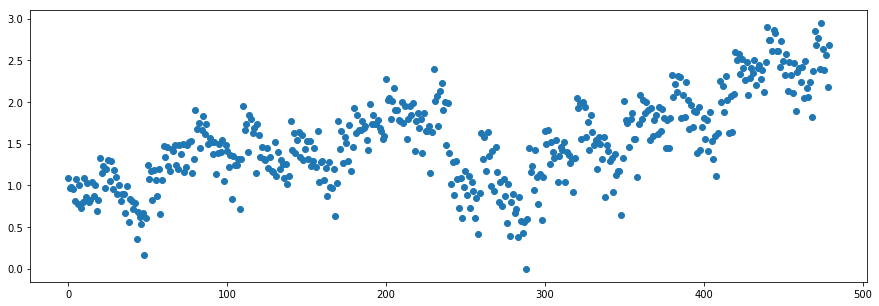

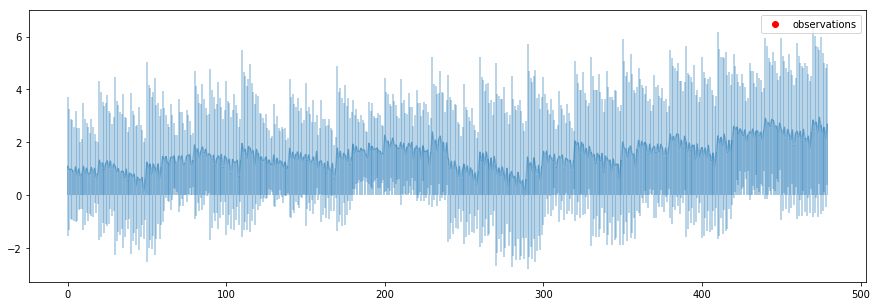

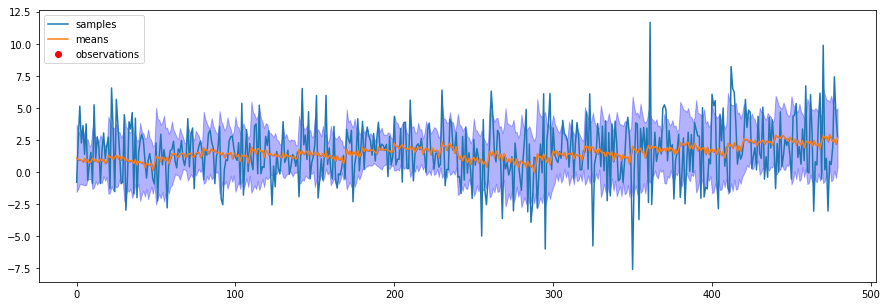

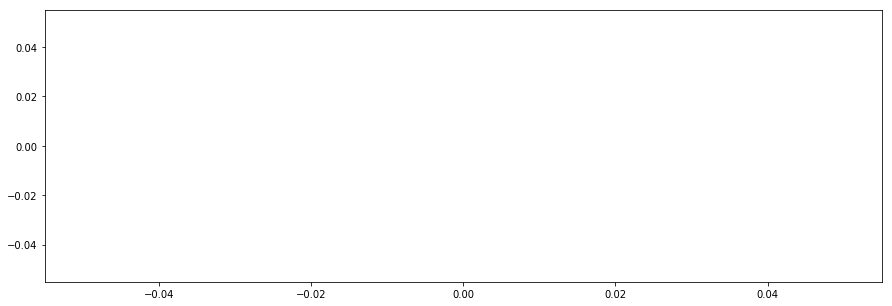

In [7]:
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 1)
new X is in there: True
new y is in there: True
mean probability is 0.5


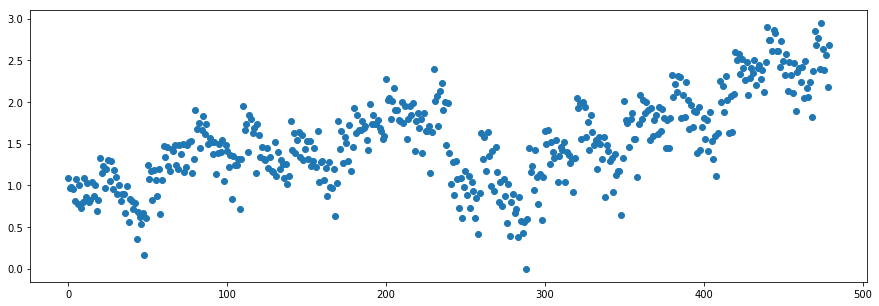

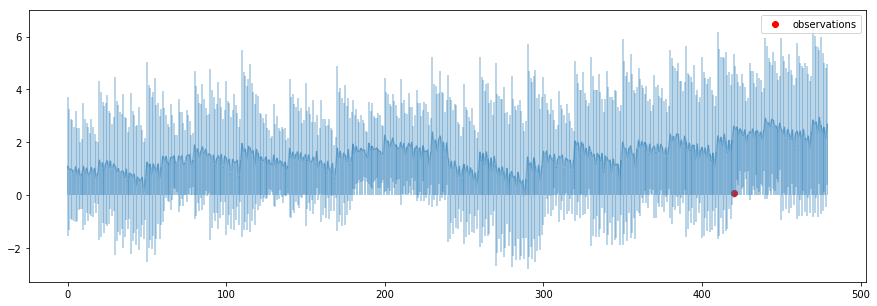

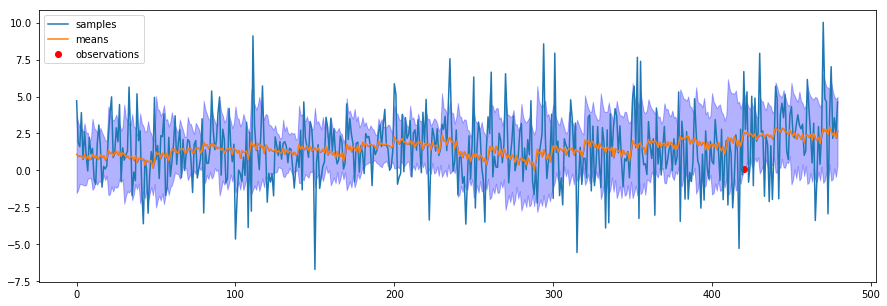

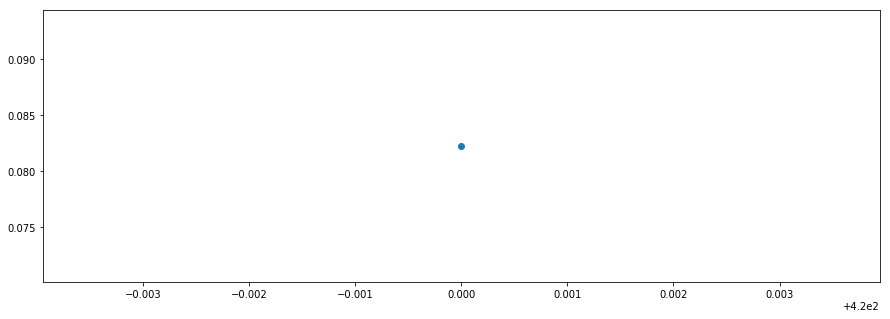

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 3)
new X is in there: True
new y is in there: True
mean probability is 1.0
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 4)
new X is in there: True
new y is in there: True
mean probability is 1.0
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 4)
new X is in there: True
new y is in there: True
mean probability is 0.8
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 4)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 7)
new X is in there: True
new y is in there: True
mean probability is 1.0
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 6)
new X is in there: True
new y is in there: True
mean probability is 0.75
initialising Network <class 'b

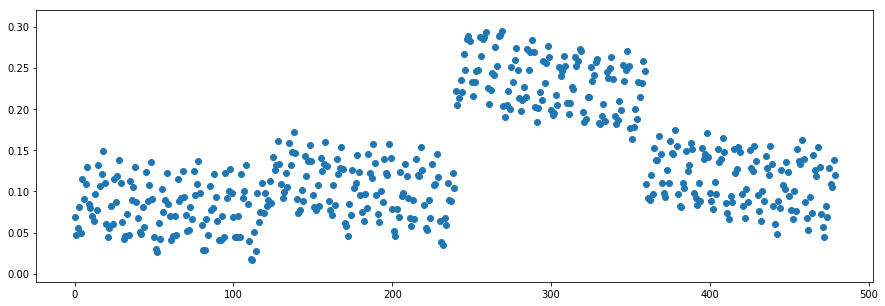

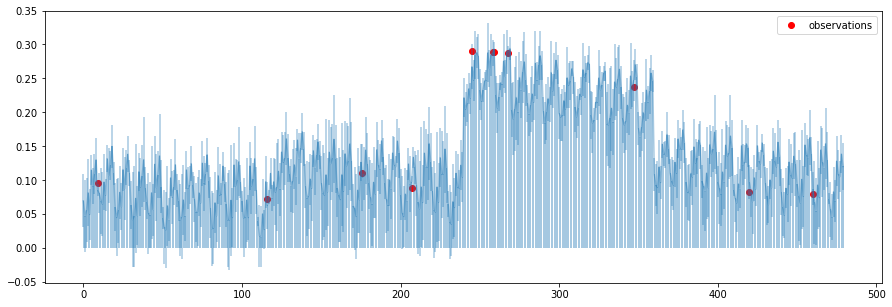

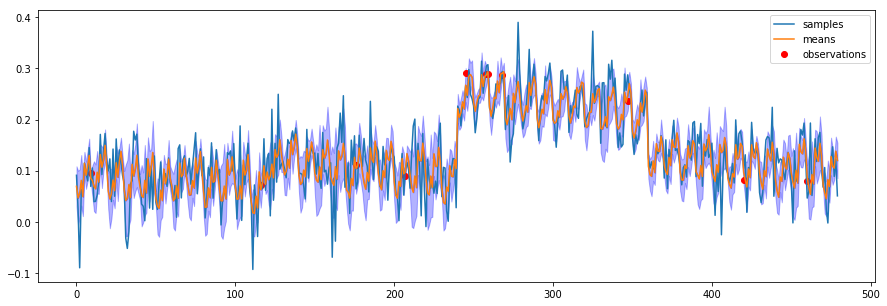

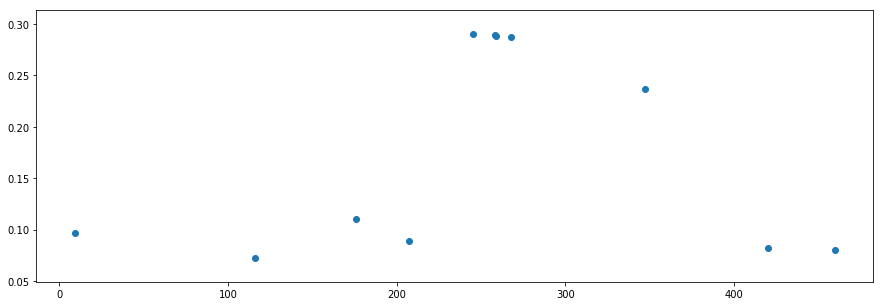

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'num_neurons': [10, 5, 10],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 100},
  'score': 0.07216993885068669,
  'X': array([[0],
         [0],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.p

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 12)
new X is in there: True
new y is in there: True
mean probability is 0.9230769230769231
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 13)
new X is in there: True
new y is in there: True
mean probability is 0.9285714285714286
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 13)
new X is in there: True
new y is in there: True
mean probability is 0.8666666666666667
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 13)
new X is in there: True
new y is in there: True
mean probability is 0.8125
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 15)
new X is in there: True
new y is in there: True
mean probability is 0.8823529411764706
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 14)
new X is in there: True
new y is in there: True
m

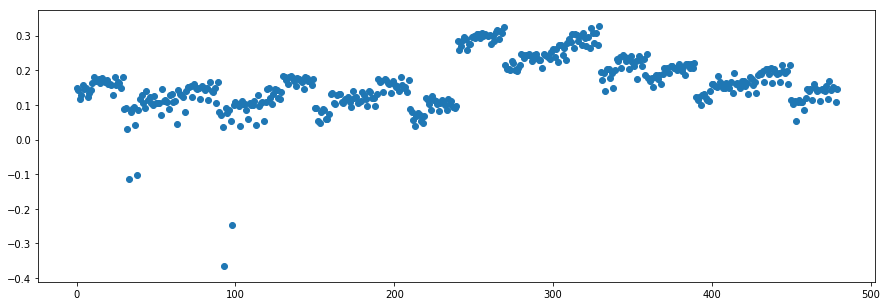

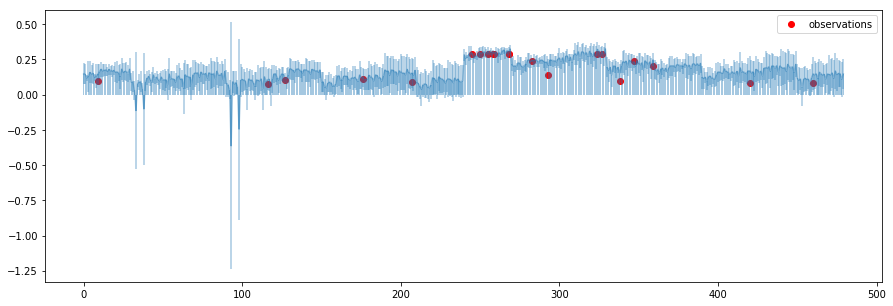

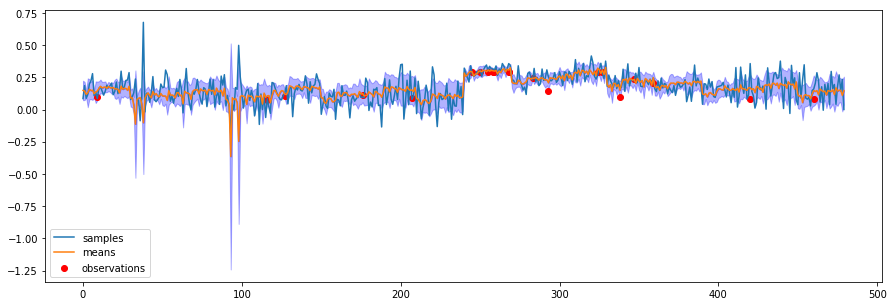

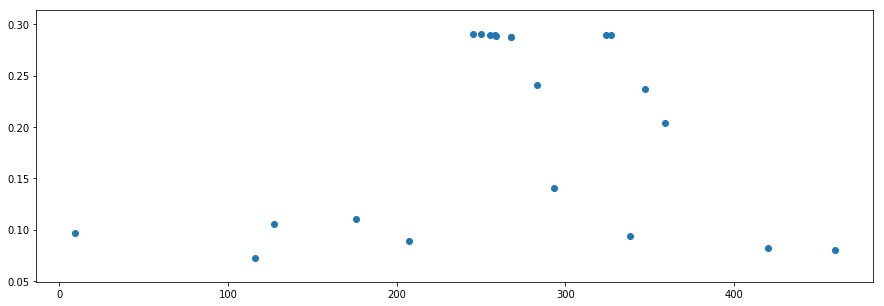

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 21)
new X is in there: True
new y is in there: True
mean probability is 0.9130434782608695
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 22)
new X is in there: True
new y is in there: True
mean probability is 0.9166666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 21)
new X is in there: True
new y is in there: True
mean probability is 0.84
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 24)
new X is in there: True
new y is in there: True
mean probability is 0.9230769230769231
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 23)
new X is in there: True
new y is in there: True
mean probability is 0.8518518518518519
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 27)
new X is in there: True
new y is in there: True
mea

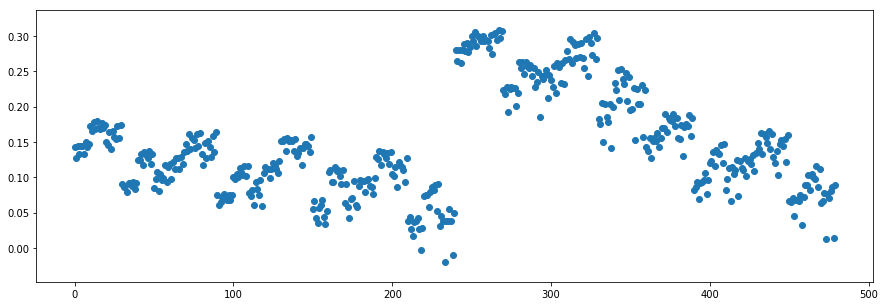

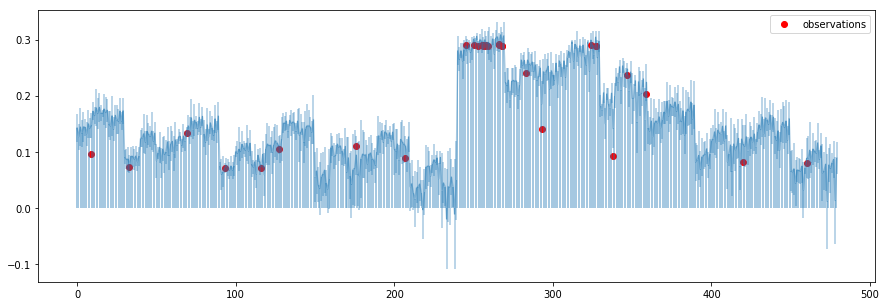

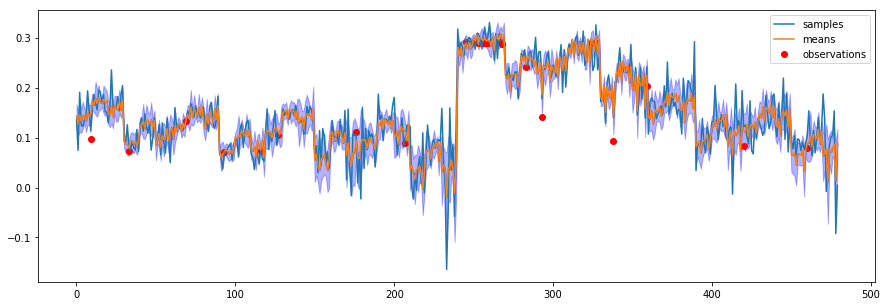

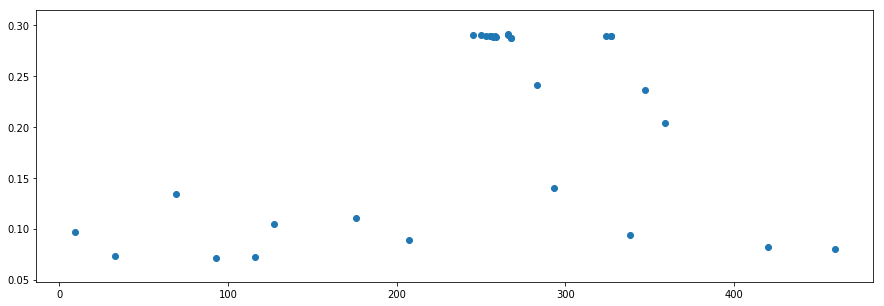

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 28)
new X is in there: True
new y is in there: True
mean probability is 0.8484848484848485
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 30)
new X is in there: True
new y is in there: True
mean probability is 0.8823529411764706
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 30)
new X is in there: True
new y is in there: True
mean probability is 0.8571428571428571
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 31)
new X is in there: True
new y is in there: True
mean probability is 0.8611111111111112
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 36)
new X is in there: True
new y is in there: True
mean probability is 0.972972972972973
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 32)
new X is in there: True
new y is in th

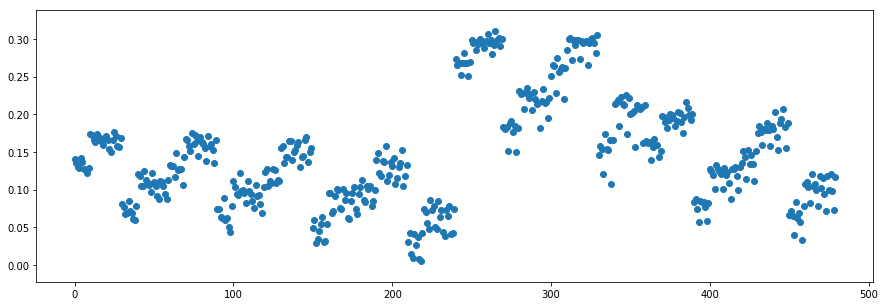

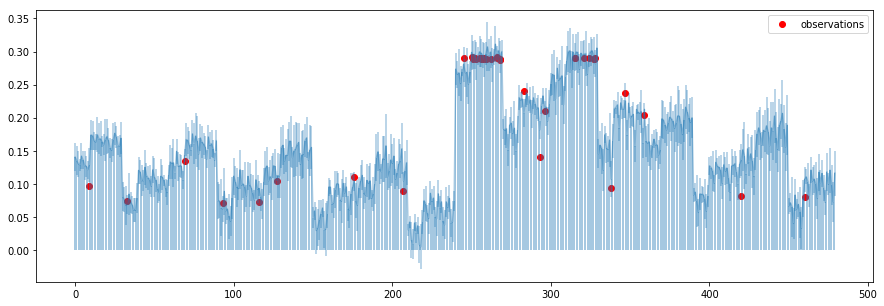

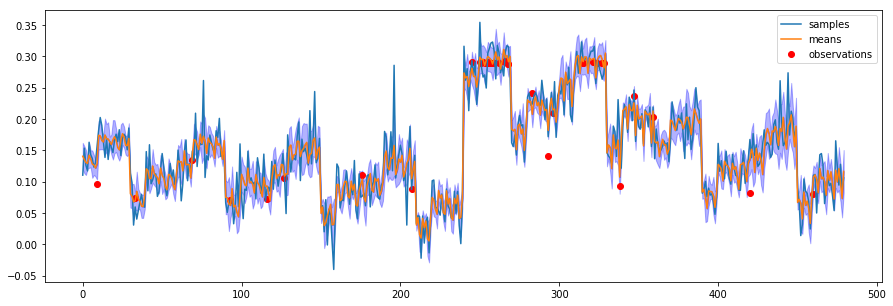

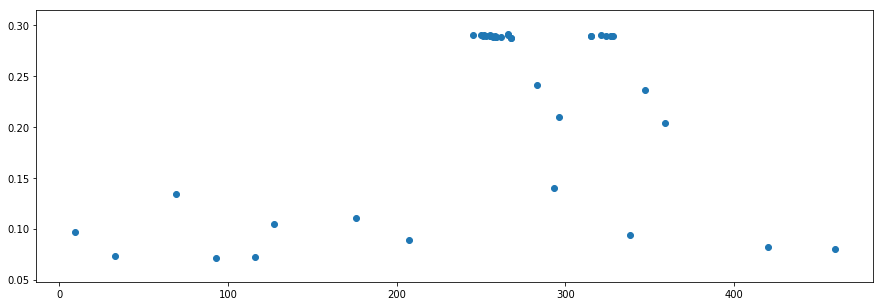

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 36)
new X is in there: True
new y is in there: True
mean probability is 0.8372093023255814
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 36)
new X is in there: True
new y is in there: True
mean probability is 0.8181818181818182
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 37)
new X is in there: True
new y is in there: True
mean probability is 0.8222222222222222
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 38)
new X is in there: True
new y is in there: True
mean probability is 0.8260869565217391
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 40)
new X is in there: True
new y is in there: True
mean probability is 0.851063829787234
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 40)
new X is in there: True
new y is in th

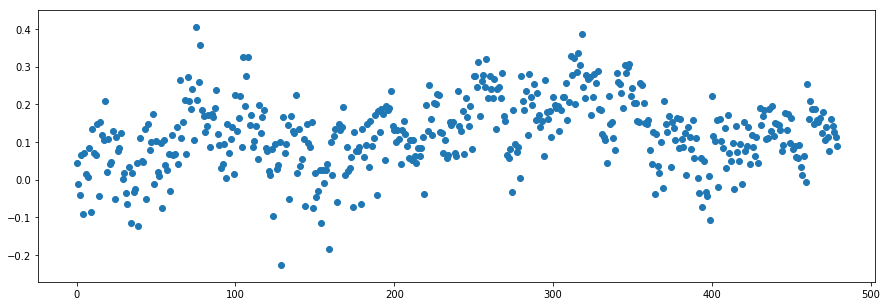

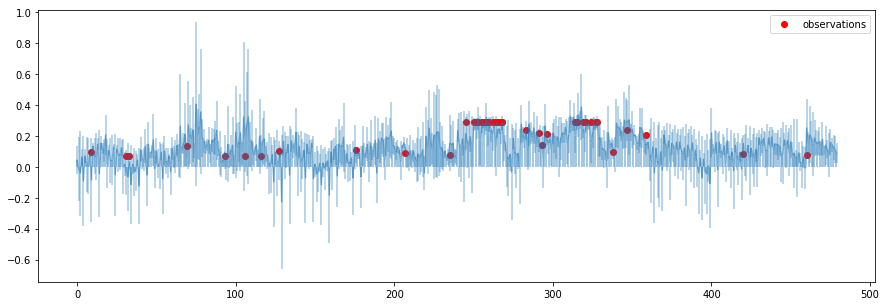

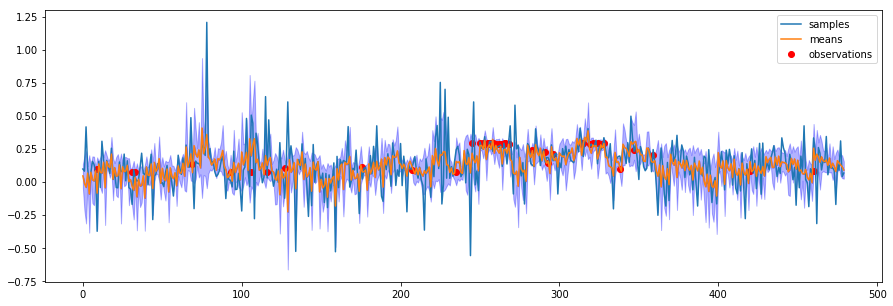

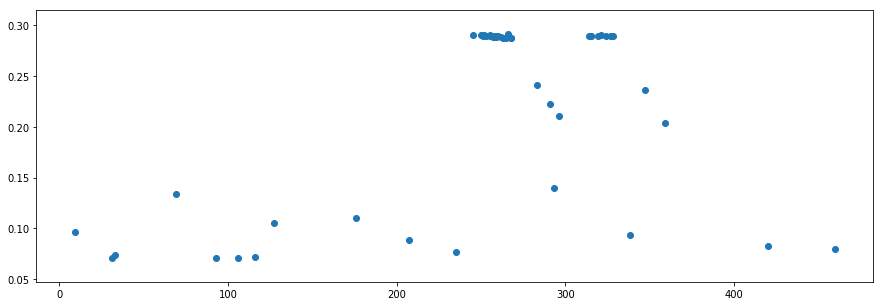

In [14]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 48)
new X is in there: True
new y is in there: True
mean probability is 0.9056603773584906
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 42)
new X is in there: True
new y is in there: True
mean probability is 0.7777777777777778
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 45)
new X is in there: True
new y is in there: True
mean probability is 0.8181818181818182
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 49)
new X is in there: True
new y is in there: True
mean probability is 0.875
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 44)
new X is in there: True
new y is in there: True
mean probability is 0.7719298245614035
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 47)
new X is in there: True
new y is in there: True
me

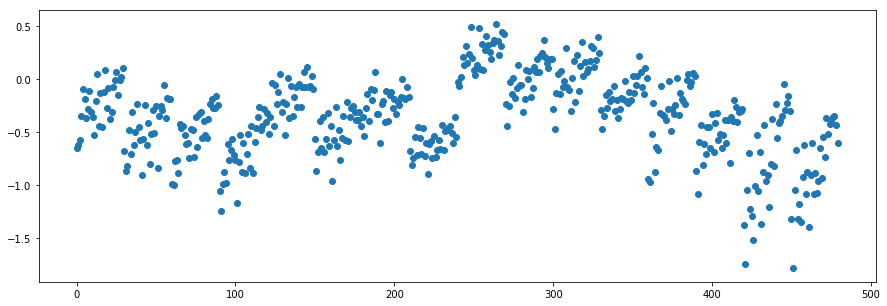

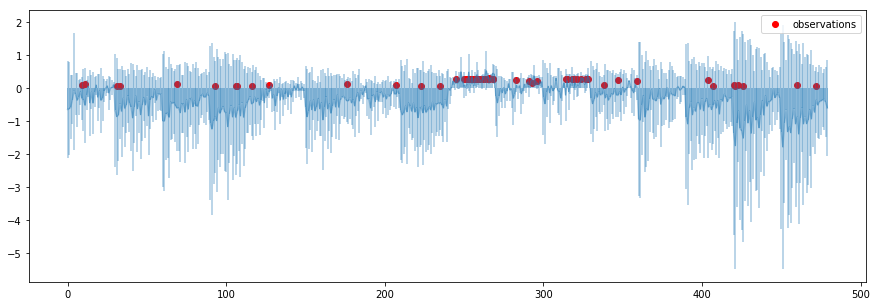

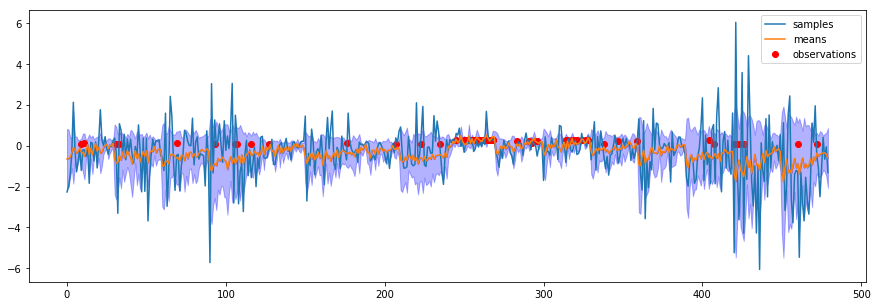

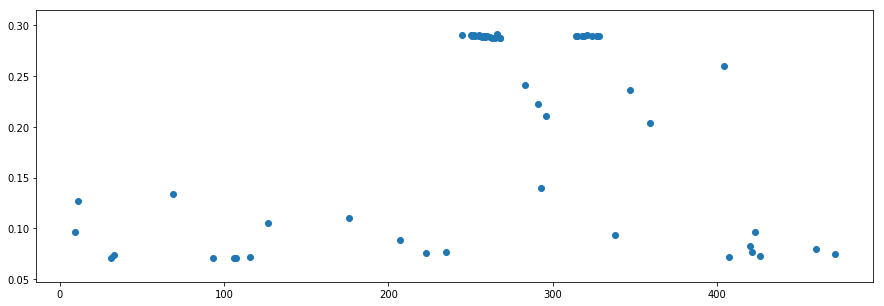

In [15]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 56)
new X is in there: True
new y is in there: True
mean probability is 0.8888888888888888
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 52)
new X is in there: True
new y is in there: True
mean probability is 0.8125
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 54)
new X is in there: True
new y is in there: True
mean probability is 0.8307692307692308
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 58)
new X is in there: True
new y is in there: True
mean probability is 0.8787878787878788
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 60)
new X is in there: True
new y is in there: True
mean probability is 0.8955223880597015
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 61)
new X is in there: True
new y is in there: True
m

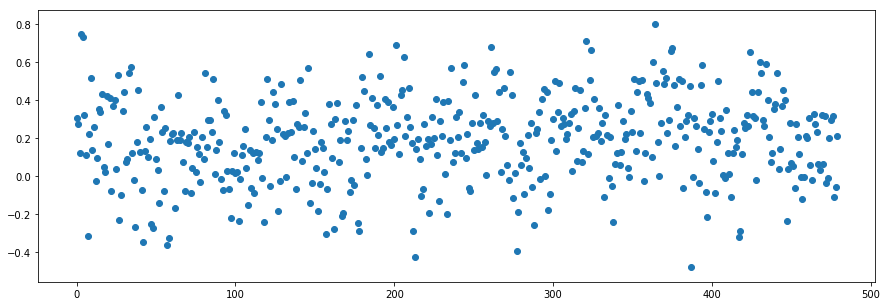

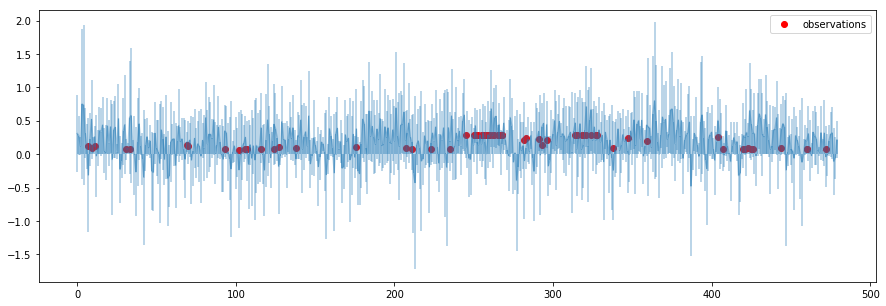

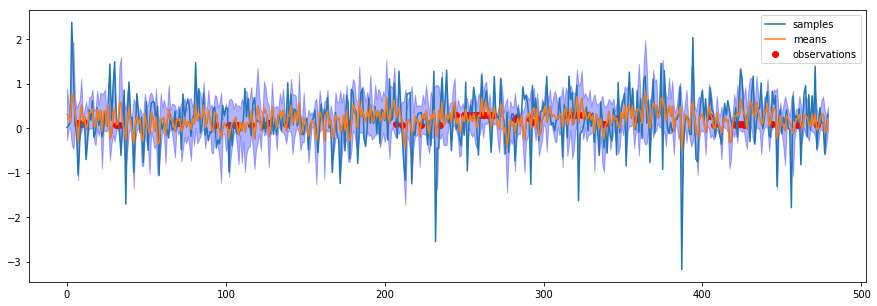

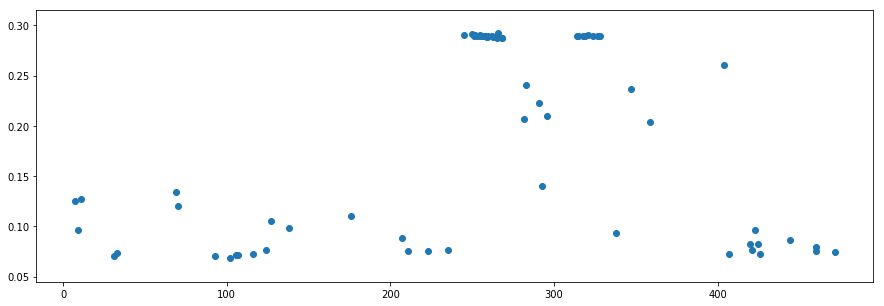

In [16]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 62)
new X is in there: True
new y is in there: True
mean probability is 0.8493150684931506
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 69)
new X is in there: True
new y is in there: True
mean probability is 0.9324324324324325
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 64)
new X is in there: True
new y is in there: True
mean probability is 0.8533333333333334
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 67)
new X is in there: True
new y is in there: True
mean probability is 0.881578947368421
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 60)
new X is in there: True
new y is in there: True
mean probability is 0.7792207792207793
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 62)
new X is in there: True
new y is in th

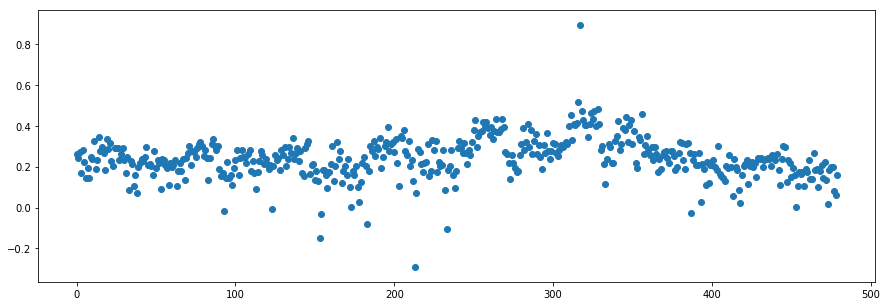

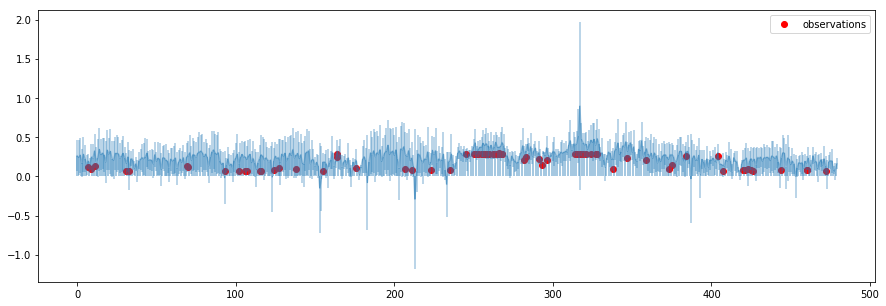

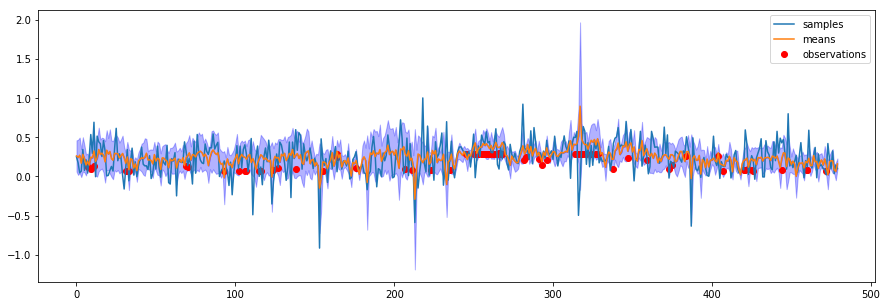

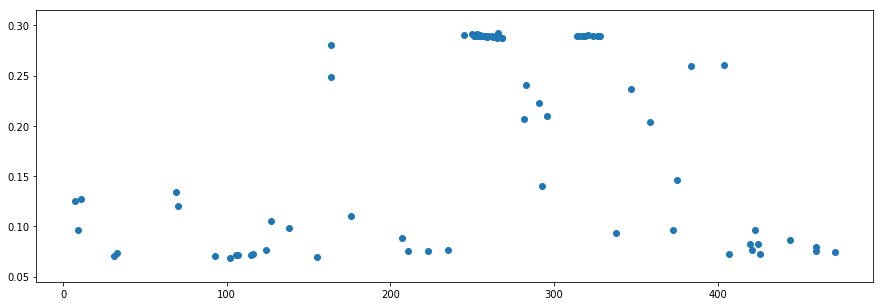

In [17]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 63)
new X is in there: True
new y is in there: True
mean probability is 0.7590361445783133
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (18, 71)
new X is in there: True
new y is in there: True
mean probability is 0.8452380952380952


In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(100)
tg.plot_sample_grid()

In [ ]:
tg.get_best_observation()